In [1]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test, pairwise_logrank_test

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

df = pd.read_pickle('PDL1_GU_DATA.pkl')

df.head()

,id,sex,race,age,tissue,specimen,primary,date_dx,anti_pdl1,outcome,date_last,pdl1_expression,pdl1_score,origin,subtype,muscle_invasion,fu_months,mortality_overall,mortality_cancer,pdl1_level
0,1,Male,Causasian,73,B,transurethral resection,Bladder,2020-01-28,No,AWD,2020-09-14,Negative,3,Primary,"UC, pure",No,7.556623,AWD + NED,AWD + NED + DOC,Negative
1,2,Male,Causasian,81,B,transurethral resection,Bladder,2019-12-12,No,AWD,2020-10-08,Positive,10,Primary,"UC, variant",No,9.889320,AWD + NED,AWD + NED + DOC,Negative
2,3,Male,Causasian,58,Ua,bx,Urethra,2017-11-01,No,AWD,2020-09-30,Positive,10,Primary,"UC, pure",NaN,34.957597,AWD + NED,AWD + NED + DOC,Negative
3,4,Female,Causasian,72,B,bX,Bladder,2020-02-24,No,DOD,2020-03-24,Positive,100,Primary,"UC, variant",No,0.952792,DOD + DOC,DOD,High
4,5,Female,Causasian,59,B,transurethral resection,Bladder,2019-06-07,Yes,AWD,2020-06-30,Positive,60,Primary,"UC, variant",Yes,12.780550,AWD + NED,AWD + NED + DOC,High


# Survival curves

In [2]:
df_survival = df.loc[:,['pdl1_level','fu_months','mortality_overall','mortality_cancer']]
df_survival['mortality_overall'].replace({'AWD + NED':0,'DOD + DOC':1}, inplace=True)
df_survival['mortality_cancer'].replace({'AWD + NED + DOC':0,'DOD':1}, inplace=True)
df_survival.head()

,pdl1_level,fu_months,mortality_overall,mortality_cancer
0,Negative,7.556623,0,0
1,Negative,9.889320,0,0
2,Negative,34.957597,0,0
3,High,0.952792,1,1
4,High,12.780550,0,0


## PD-L1 level and overall mortality

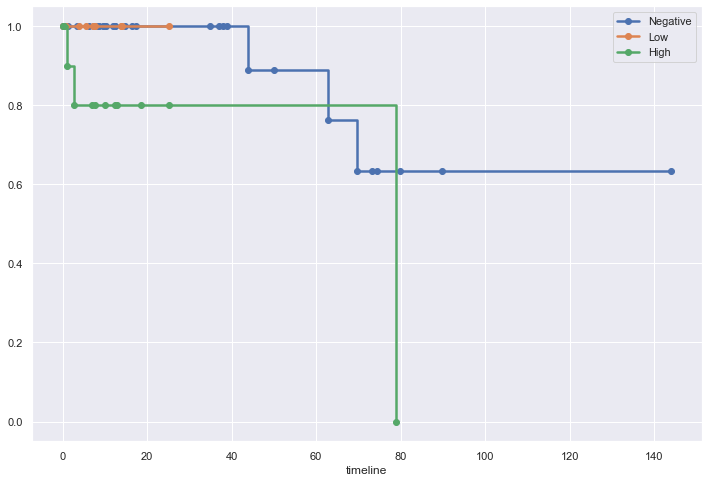

In [3]:
kmf = KaplanMeierFitter()
for name, data in df_survival.groupby('pdl1_level'):
    kmf.fit(data['fu_months'], data['mortality_overall'], label=name)
    kmf.plot(ci_show=False, lw=2.5, marker='o')

In [4]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival['fu_months'], df_survival['pdl1_level'], df_survival['mortality_overall'])
print(results.p_value)

0.09729248179243781


## PD-L1 expression and cancer-related mortality 

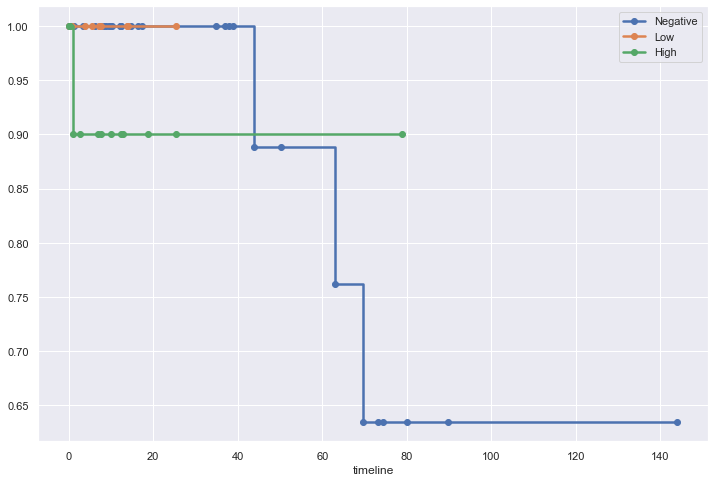

In [5]:
for name, data in df_survival.groupby('pdl1_level'):
    kmf.fit(data['fu_months'], data['mortality_cancer'], label=name)
    kmf.plot(ci_show=False, linewidth=2.5, marker='o')

In [6]:
# P value (log-rank test)
results = multivariate_logrank_test(df_survival['fu_months'], df_survival['pdl1_level'], df_survival['mortality_cancer'])
print(results.p_value)

0.7899827163545653
